# Imports

In [1]:
from numpy.random import seed
seed(888)


In [122]:
import os
import numpy as np
import tensorflow as tf
import itertools


import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
tf.random.set_seed(404)


from IPython.display import display
from keras.preprocessing.image import array_to_img
from keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt

# Constants

In [112]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
NR_CLASSES =10

VALIDATION_SIZE = 1000
SMALL_TRAIN_SIZE = 1000

# Get the Data

In [4]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data() 

# Explore the Data

In [5]:
x_train_all[0].shape


(32, 32, 3)

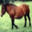

In [6]:
pic = array_to_img(x_train_all[7])
display(pic)

In [7]:
y_train_all[7][0]

7

In [8]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

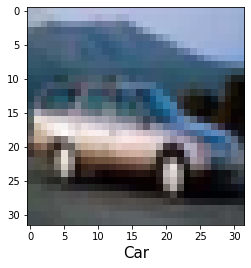

In [9]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]], fontsize=15)
plt.show()

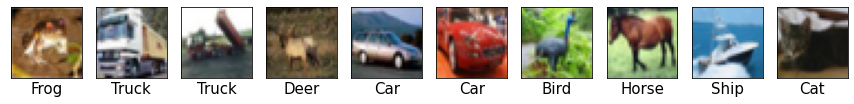

In [10]:
plt.figure(figsize=(15, 5)) 
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train_all[i])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=15)
    plt.xticks([])
    plt.yticks([])

plt.show()
    

In [11]:
x_train_all[0].shape

(32, 32, 3)

In [12]:
nr_images, x, y, c = x_train_all.shape
print(f'images = {nr_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

images = 50000 	| width = 32 	| height = 32 	| channels = 3


In [13]:
x_test.shape

(10000, 32, 32, 3)

# Preprocess Data

In [14]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [15]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0

In [16]:
type(x_train_all[0][0][0][0])

numpy.float64

In [17]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [18]:
x_train_all.shape

(50000, 3072)

In [19]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
x_test.shape

(10000, 3072)

### Create Validation Dataset

In [20]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]


In [21]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]

### Create a small dataset (for illustration)

In [48]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

# Define the Neural Network using Keras

In [75]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1'),
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(16, activation='relu', name='m1_hidden3'),
    Dense(10, activation='softmax', name='m1_output')
], name='m1')

model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [76]:
model_2 = Sequential(name='m2')
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(16, activation='relu', name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax', name='m2_ouput'))
model_2.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [74]:
model_3 = Sequential(name='m2')
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128, activation='relu', name='m3_hidden1'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation='relu', name='m3_hidden2'))
model_3.add(Dense(16, activation='relu', name='m3_hidden3'))
model_3.add(Dense(10, activation='softmax', name='m3_ouput'))
model_3.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [32]:
type(model_1)

keras.engine.sequential.Sequential

In [33]:
model_1.summary()

Model: "m1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [37]:
(32*32*3*128 + 128) + (128*64 + 64) + (64*16 + 16) + (16*10 + 10)

402810

# Tensorboard (visualising learning)

In [46]:
def get_tensorboard(model_name):

    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.str)
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir=dir_paths)

# Fit the Model

In [63]:
samples_per_batch = 1000

In [ ]:
# %%time

# nr_epochs = 150
# model_1.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs,
#             callbacks=[get_tensorboard('Model 1')], verbose=0, validation_data=(x_val, y_val))

In [77]:
%%time

nr_epochs = 100
model_1.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 1 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
CPU times: user 10min 7s, sys: 11min 25s, total: 21min 33s
Wall time: 3min 1s


In [78]:
%%time

nr_epochs = 100
model_2.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 2 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
CPU times: user 59min 23s, sys: 14min 36s, total: 1h 14min
Wall time: 16min 4s


In [79]:
%%time

nr_epochs = 100
model_3.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 3 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
CPU times: user 1h 6min 49s, sys: 17min 39s, total: 1h 24min 29s
Wall time: 11min 52s


In [73]:
# %%time

# nr_epochs = 150
# model_2.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs,
#             callbacks=[get_tensorboard('Model 2')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
CPU times: user 1min 44s, sys: 46.4 s, total: 2min 30s
Wall time: 21.5 s


# Prediction on Indivivdual Images

In [82]:
x_val[0].shape

(3072,)

In [83]:
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [86]:
np.set_printoptions(precision=3)

In [88]:
model_2.predict(test)

array([[0.042, 0.009, 0.126, 0.107, 0.221, 0.065, 0.397, 0.031, 0.001,
        0.002]], dtype=float32)

In [91]:
model_2.predict(x_val)

array([[4.183e-02, 9.213e-03, 1.262e-01, ..., 3.063e-02, 8.147e-04,
        2.354e-03],
       [2.883e-02, 4.818e-01, 2.004e-02, ..., 2.756e-02, 2.349e-01,
        8.480e-02],
       [6.265e-04, 3.686e-03, 1.735e-03, ..., 6.138e-02, 5.162e-03,
        9.128e-01],
       ...,
       [2.825e-02, 8.956e-01, 5.970e-03, ..., 8.929e-03, 2.694e-03,
        4.501e-02],
       [9.194e-03, 2.224e-02, 8.992e-02, ..., 2.493e-02, 1.579e-01,
        3.599e-01],
       [7.516e-04, 4.005e-03, 4.773e-02, ..., 2.042e-02, 6.652e-05,
        2.028e-02]], dtype=float32)

In [92]:
model_2.predict_classes(test)

array([6])

In [93]:
y_val[0]

array([6], dtype=uint8)

In [97]:
for i in range(10):
    predicted_val = model_2.predict_classes(np.expand_dims(x_val[i], axis=0))
    print(f'Actual Value: {y_val[i][0]} vs. predicted {predicted_val[0]}')

Actual Value: 6 vs. predicted 6
Actual Value: 9 vs. predicted 1
Actual Value: 9 vs. predicted 9
Actual Value: 4 vs. predicted 6
Actual Value: 1 vs. predicted 1
Actual Value: 1 vs. predicted 1
Actual Value: 2 vs. predicted 2
Actual Value: 7 vs. predicted 7
Actual Value: 8 vs. predicted 8
Actual Value: 3 vs. predicted 7


# Evaluation

In [100]:
model_2.metrics_names

['loss', 'accuracy']

In [102]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

10000/10000 [==============================] - 1s 55us/step
Test loss is 1.39 and test accuracy is 50.7%


### Confusion Matrix

In [106]:
conf_matrix = confusion_matrix(y_test, model_2.predict_classes(x_test))

In [134]:
conf_matrix[0]

array([510,  36, 102,  20,  47,  19,  29,  22, 190,  25])

In [108]:
conf_matrix.min()

4

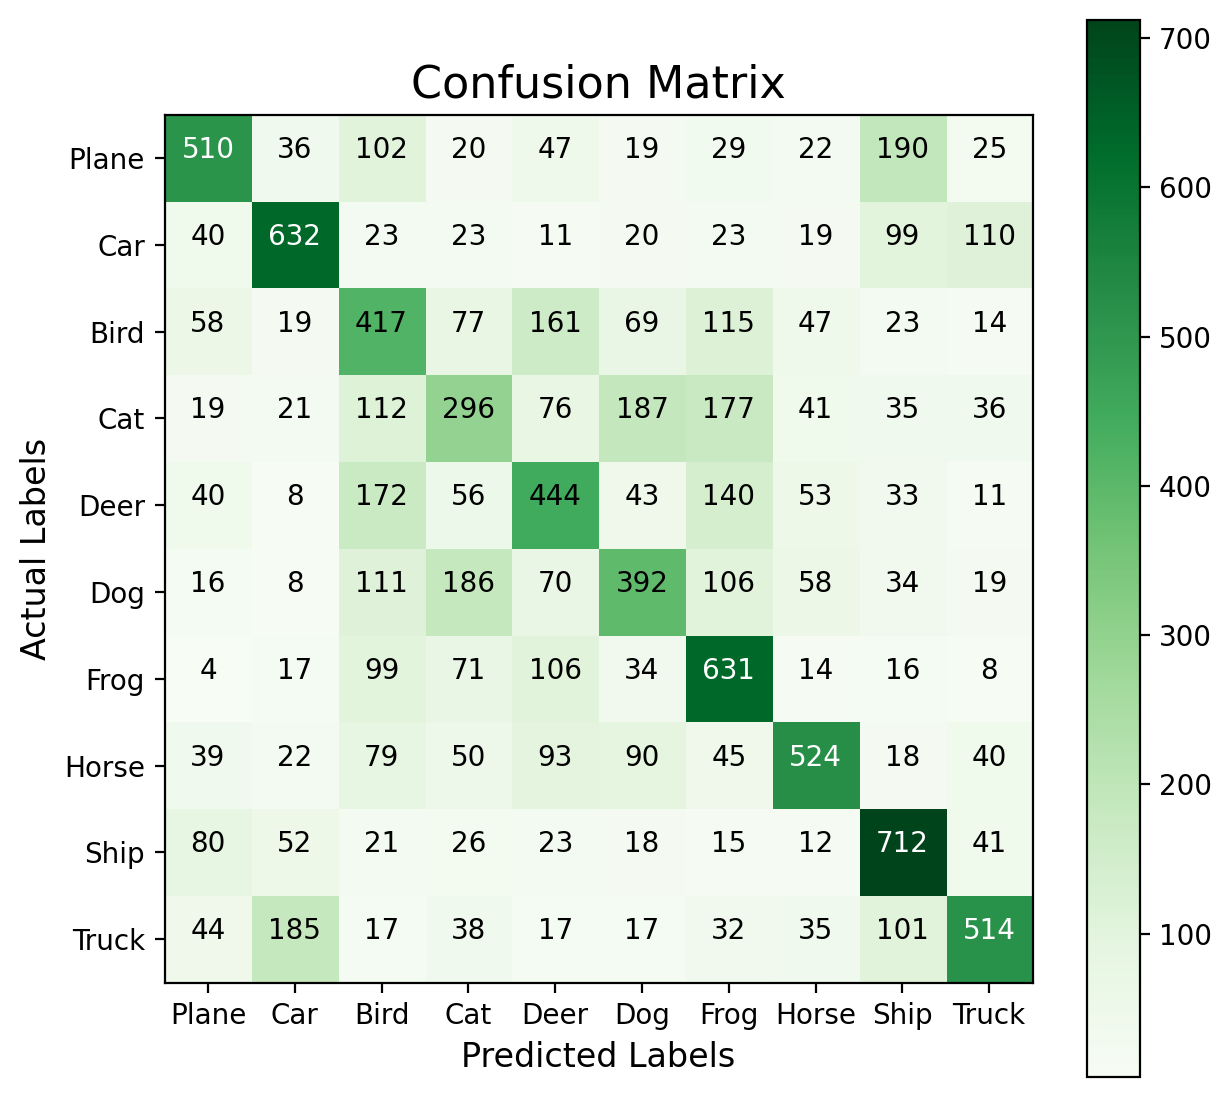

In [137]:
plt.figure(figsize=(7,7), dpi=200)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i,j in itertools.product(range(10), range(10)):
    plt.text(j, i, conf_matrix[i,j], horizontalalignment='center', 
            color='white' if conf_matrix[i, j] > 450 else 'black')

plt.show()

In [138]:
np.diag(conf_matrix)

array([510, 632, 417, 296, 444, 392, 631, 524, 712, 514])

In [140]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.51 , 0.632, 0.417, 0.296, 0.444, 0.392, 0.631, 0.524, 0.712,
       0.514])

In [141]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.6  , 0.632, 0.362, 0.351, 0.424, 0.441, 0.481, 0.635, 0.565,
       0.628])

In [142]:
avg_recall = np.mean(recall)
print(f'Model 2 recall score is {avg_recall:.2%}')

Model 2 recall score is 50.72%


In [143]:
avg_precision = np.mean(precision)
print(f'Model 2 precision score is {avg_precision:.2%}')

Model  2 precision score is 51.18%


In [148]:
f1_score = (avg_precision*avg_recall*2) / (avg_precision + avg_recall)
print(f'Model 2 f1 score {f1_score:.2%}')

Model 2 f1 score 50.95%
